https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e

Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skopt.space import Integer
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import plotly.express as px
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
#import shap
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
df = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/G_treino_imagens.csv', engine='python',sep=';')

In [3]:
X = df.drop('Grade', axis = 1)
y = df['Grade']

In [4]:
X

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,69.0,82.0,39055374.0,0.93,7.0,2.63,89.0,4.06,76.07,77.0,...,1.46,0.02,4.50,0.01,412877.40,17.48,0.00,0.54,0.01,0.03
1,26.0,55.0,13954745.0,1.06,24.0,1.63,63.0,10.18,38.23,34.0,...,2.17,0.08,4.71,0.00,405923.03,14.66,0.01,0.61,0.01,0.06
2,151.0,158.0,9407036.0,0.20,4.0,2.82,162.0,2.14,154.69,155.0,...,1.80,0.06,2.52,0.02,16119.27,1.53,0.09,0.18,0.00,0.18
3,80.0,125.0,365039945.0,1.58,27.0,2.17,143.0,14.08,104.94,107.0,...,8.60,0.01,6.80,0.01,173384.82,12.72,0.00,5.63,0.01,0.05
4,117.0,131.0,53871253.0,1.00,9.0,2.31,137.0,4.41,124.44,125.0,...,2.27,0.10,4.54,0.01,153176.87,12.37,0.01,0.61,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,43.0,111.0,346180978.0,1.99,48.0,1.63,144.0,23.37,79.46,81.0,...,15.66,0.01,7.41,0.01,291149.41,7.09,0.00,14.67,0.01,0.11
327,62.0,130.0,592814057.0,1.72,54.0,1.87,155.0,22.98,103.48,114.0,...,13.38,0.02,7.20,0.01,787064.69,7.89,0.00,9.06,0.01,0.09
328,64.0,100.0,261386671.0,1.30,21.0,2.26,117.0,11.45,83.33,85.0,...,6.64,0.02,6.42,0.01,567682.91,14.96,0.00,3.45,0.01,0.04
329,27.0,61.0,108584437.0,1.22,21.0,2.02,84.0,10.70,44.33,44.0,...,5.06,0.02,6.95,0.01,591170.34,37.31,0.00,5.51,0.01,0.02


In [5]:
y

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
326    1.0
327    1.0
328    1.0
329    2.0
330    2.0
Name: Grade, Length: 331, dtype: float64

In [6]:
X.shape

(331, 1302)

In [7]:
y.shape

(331,)

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

In [9]:
oversample = SMOTE(k_neighbors = 2)
X, y = oversample.fit_resample(X, y)

In [10]:
gnb=GaussianNB()
fit = gnb.fit(X,y)
desempenho_cross_val = cross_val_score(gnb, X, y, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
gnb.score(X,y)

Desempenho médio: 74.07 ± 3.77


0.7433862433862434

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        21
         1.0       1.00      0.38      0.56        13
         2.0       0.27      1.00      0.43         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.76        38
   macro avg       0.56      0.60      0.49        38
weighted avg       0.89      0.76      0.76        38



c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Desempenho médio: 87.14 ± 7.94


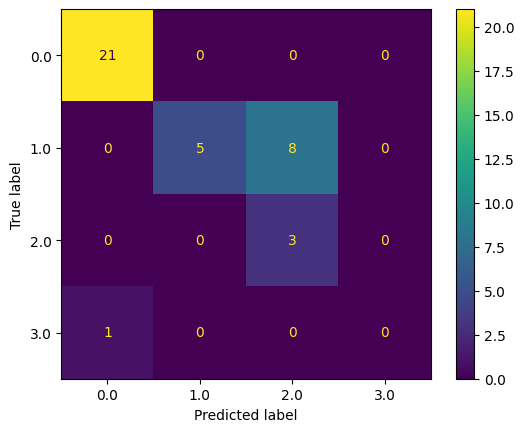

In [11]:
dft=pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/G_teste_imagens.csv', engine='python',sep=';')
Xt = dft.drop('Grade', axis =1)
yt = dft['Grade']
y_t = fit.predict(Xt)
print(classification_report(yt, y_t))
ConfusionMatrixDisplay.from_predictions(yt,y_t,values_format='.7g')
desempenho_cross_val = cross_val_score(gnb, Xt, yt, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))

Desempenho médio: 87.14 ± 7.94


c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


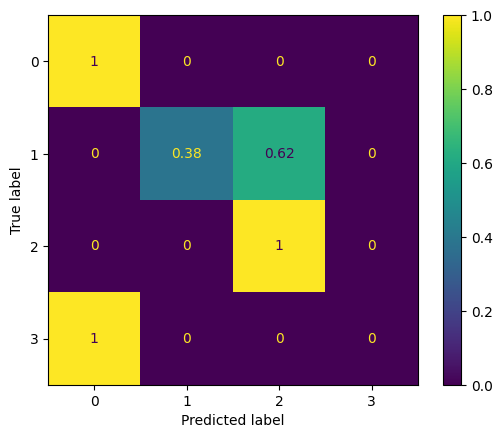

In [12]:
desempenho_cross_val = cross_val_score(gnb, Xt, yt, scoring = 'accuracy', cv = 5)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))
# Confusion matrix
cm = confusion_matrix(yt, y_t)
    
    # Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1,2,3])
disp.plot()
plt.show()

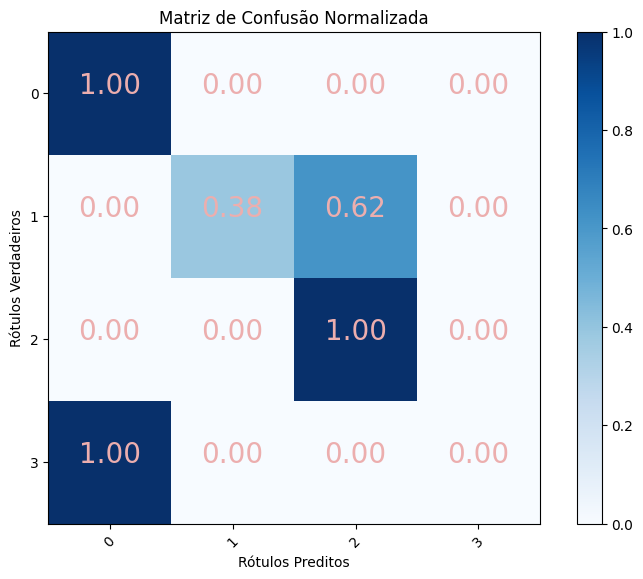

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(yt, y_t, normalize='true')

# Criar um heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão Normalizada')
plt.colorbar()

# Adicionar rótulos aos eixos
class_labels = ['0','1','2','3']  # Substitua pelos seus rótulos
# Configure o tamanho da fonte
plt.rc('font', size=20)  # Defina o tamanho da fonte desejado
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Adicionar os valores nas células
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{cm[i, j]:.2f}", horizontalalignment="center", color="#ECAEAE")

plt.tight_layout()
plt.xlabel('Rótulos Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()